In [1]:
import numpy as np

import pandas as pd
from pandas import read_csv

from matplotlib import pyplot as plt

from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Load Data

In [2]:
df = read_csv('data_ss.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54074 entries, 0 to 54073
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CO2_working_capacity         54074 non-null  float64
 1   CO2/N2_selectivity           54074 non-null  float64
 2   heat_adsorption_CO2          54074 non-null  float64
 3   density                      54074 non-null  float64
 4   surface_area                 54074 non-null  float64
 5   void_fraction                54074 non-null  float64
 6   void_volume                  54074 non-null  float64
 7   og1_linker_RB                54074 non-null  int64  
 8   og1_linker_nTripleBond       54074 non-null  int64  
 9   og1_linker_nSingleBond       54074 non-null  int64  
 10  og2_linker_nTripleBond       54074 non-null  int64  
 11  og2_linker_cLogP             54074 non-null  float64
 12  og2_linker_AP                54074 non-null  float64
 13  og2_linker_atomI

In [4]:
df_train = df.drop(['functional_groups', 'topology'], axis = 1)
# df_train.info()

# drop topology one-hot
df_train = df_train.drop(df_train.columns[15:], axis = 1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54074 entries, 0 to 54073
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CO2_working_capacity         54074 non-null  float64
 1   CO2/N2_selectivity           54074 non-null  float64
 2   heat_adsorption_CO2          54074 non-null  float64
 3   density                      54074 non-null  float64
 4   surface_area                 54074 non-null  float64
 5   void_fraction                54074 non-null  float64
 6   void_volume                  54074 non-null  float64
 7   og1_linker_RB                54074 non-null  int64  
 8   og1_linker_nTripleBond       54074 non-null  int64  
 9   og1_linker_nSingleBond       54074 non-null  int64  
 10  og2_linker_nTripleBond       54074 non-null  int64  
 11  og2_linker_cLogP             54074 non-null  float64
 12  og2_linker_AP                54074 non-null  float64
 13  og2_linker_atomI

In [5]:
X = df_train.drop('CO2_working_capacity', axis = 1)
y = df_train['CO2_working_capacity'].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train

,CO2_working_capacity,CO2/N2_selectivity,heat_adsorption_CO2,density,surface_area,void_fraction,void_volume,og1_linker_RB,og1_linker_nTripleBond,og1_linker_nSingleBond,og2_linker_nTripleBond,og2_linker_cLogP,og2_linker_AP,og2_linker_atomInRingsRatio,og2_linker_nAromaticBond
23912,130.462802,13.646863,5.545981,0.721259,2727.99,0.35561,0.4930,0,0,3,0,2.44018,1.000000,1.000000,11
52440,12.107044,17.267465,5.044852,1.228662,1140.54,0.27981,0.2277,0,2,14,2,0.90398,0.000000,0.666667,0
45289,148.457962,19.424196,5.534532,0.917302,1688.07,0.29359,0.3201,0,0,0,0,4.74658,1.000000,1.000000,21
5815,230.429033,54.673990,7.442451,1.399875,927.85,0.18238,0.1303,1,0,1,0,2.44018,1.000000,1.000000,11
7,59.739057,10.999299,5.539327,0.623834,3276.11,0.41004,0.6573,0,0,0,0,6.93878,0.761905,0.904762,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,121.783077,27.256049,5.940989,1.579951,1031.34,0.21327,0.1350,0,1,0,0,2.44018,1.000000,1.000000,11
44732,202.940651,40.418769,6.861470,1.559030,630.97,0.15121,0.0970,0,0,0,0,3.59338,1.000000,1.000000,16
38158,81.033106,18.374829,5.657585,0.824344,1997.11,0.27535,0.3340,0,0,3,0,3.45738,0.857143,0.857143,12
860,68.297946,13.670052,4.964187,0.697246,2950.88,0.37112,0.5323,0,0,0,0,4.18438,1.000000,1.000000,19


# DNN Model

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn import preprocessing

In [9]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

[[1.1088902e+02 2.1472874e+01 5.6240263e+00 8.9619809e-01 2.1126626e+03
  3.0800247e-01 4.5871526e-01 3.7240788e-01 1.8715158e-01 1.5273124e+00
  4.1170660e-01 2.8978281e+00 5.5856055e-01 7.8140241e-01 1.1603384e+01]]


In [10]:
def build_and_compile_model(norm):
  model = Sequential([
      norm,
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dense(64, activation='relu'),
      Dropout(0.2),
      Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [11]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto', restore_best_weights=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 15)                31        
_________________________________________________________________
dense (Dense)                (None, 64)                1024      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 6

In [12]:
history = dnn_model.fit(X_train,  y_train, validation_split = 0.2, epochs=30, callbacks=[monitor])

Epoch 1/30
1082/1082 [==============================] - 6s 4ms/step - loss: 17.8662 - val_loss: 4.7964
Epoch 2/30
1082/1082 [==============================] - 4s 4ms/step - loss: 10.2429 - val_loss: 3.4638
Epoch 3/30
1082/1082 [==============================] - 4s 4ms/step - loss: 9.8885 - val_loss: 2.5860
Epoch 4/30
1082/1082 [==============================] - 4s 4ms/step - loss: 9.8044 - val_loss: 2.9768
Epoch 5/30
1082/1082 [==============================] - 4s 4ms/step - loss: 9.7570 - val_loss: 4.1802
Epoch 6/30
1082/1082 [==============================] - 4s 4ms/step - loss: 9.7586 - val_loss: 2.0189
Epoch 7/30
1082/1082 [==============================] - 4s 4ms/step - loss: 9.6428 - val_loss: 4.6192
Epoch 8/30
1082/1082 [==============================] - 4s 4ms/step - loss: 9.5238 - val_loss: 2.6611
Epoch 9/30
1082/1082 [==============================] - 4s 4ms/step - loss: 9.5911 - val_loss: 3.3526
Epoch 10/30
1082/1082 [==============================] - 4s 4ms/step - loss: 9.4

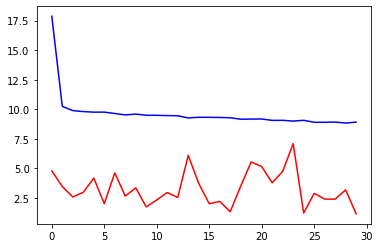

In [13]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.plot(loss_values, 'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')

In [14]:
y_train_pred = dnn_model.predict(X_train)
y_test_pred = dnn_model.predict(X_test)

In [35]:
num = 10
real = y_test[:num]
predicted = [y_test_pred[i][0] for i in range(0,num)]
  
dict = { 
    'real': real,
    'predicted': predicted
}
    
predict = pd.DataFrame(dict)

predict

,real,predicted
0,143.151576,139.953049
1,62.808160,64.455376
2,-4.046852,-2.199294
3,-6.129127,-4.985468
4,66.724601,64.734680
5,61.675735,61.886395
6,99.334318,100.730057
7,248.853061,246.204544
8,124.596147,124.945778
9,72.819227,73.322441


In [36]:
# mse_neural, mae_neural = dnn_model.evaluate(X_test, y_test)
# print('MSE from neural net: ', mse_neural)
# print('MAE from neural net: ', mae_neural)

In [17]:
dnn_model.evaluate(X_test, y_test)

338/338 [==============================] - 1s 2ms/step - loss: 1.1311


1.1310585737228394

In [ ]:
# test_results = {}
# test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test, verbose=0)

In [ ]:
# test_results

# Submission